In [1]:
from utils import *

set_cache_dir('pickles/slides1')

ERROR 1: PROJ: proj_create_from_database: Open of /home/arthur/miniforge3/envs/climada_env/share/proj failed


# Introduction to Sustainability & Climate Risk Analytics

## Climate Risk

Climate Risk Analysis is quickly developing as there is an urge to better:
1. Predict risk due to climate events. For instance, insurance companies may want to better understand the financial risk due to tropical cyclones, floods, etc. The risk might be defined in the long term or in the short term as a particular event is taking place.
2. Mitigate the risk. Counter-measures are often available to mitigate the risk posed by certain types of events. Those measures usually come at a heavy financial cost, but on the other hand, this cost may be balanced out in the future if they efficiently reduce the impact of natural disasters.
3. Understand the impact of Climate Change on Climate Risk. Climate Change results in an increasing frequency and intensity of natural disasters. 

Climate Risk Analysis is concerned with understanding the impact of extreme climate events, or natural disasters. Do you have examples of recent such natural disasters?

1. Tropical Cyclone in Mayotte, France
2. Fires in Los Angeles, USA
3. Floods in Cataluna, Spain.

<img src="https://ichef.bbci.co.uk/ace/standard/800/cpsprodpb/3036/live/ebfe1640-bad6-11ef-9272-bdd1f3551406.jpg.webp" style="width: 30%; display: inline-block; margin: 5px;" />
<img src="https://i.guim.co.uk/img/media/3c0d3ce27f07a7a5718951aa03f142636639e1fc/0_347_6792_4077/master/6792.jpg?width=1900&dpr=1&s=none&crop=none" style="width: 30%; display: inline-block; margin: 5px;" />
<img src="https://ogden_images.s3.amazonaws.com/www.mariettatimes.com/images/2024/11/04144125/AP-Spain-Floods-1-1100x734.jpg" style="width: 30%; display: inline-block; margin: 5px;" />

More generally, can you think of different types of natural disasters?

Tropical Cyclones&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Floods&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Forest Fires

Coastal floods&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Earthquake&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Volcanic eruption

Heatwave&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Winterstorm&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
drought

Additionally, the occurence of natural disasters may occur in non-independent ways. This has been referred to as *compound events*. Among the natural disasters we mentionned, can you think of combinations of them that are likely to occur together?

Zscheischler, J. et al. (2018) ‘Future climate risk from compound events’, Nature Climate Change, 8(6), pp. 469–477. Available at: https://doi.org/10.1038/s41558-018-0156-3.


The impact of such events can take multiple forms, e.g. 
1. Loss of life
2. Financial loss
3. Ecological loss

## What you will learn in this module

1. Define a framework for a Climate Risk Analysis
2. Leverage diverse sources of data to feed your analysis
3. Model extreme events using historical data
4. Interpret the analysis outputs
5. Understand the sources of uncertainty

## What tools you will learn to use

1. CLIMADA: to quickly get you started, we will start with a Python Package for Climate Risk Analysis called CLIMADA.
2. Python packages for climate data: in the second part of this course, you will learn to use some Python libraries to leverage a wide variety of data sources

## How you will be assessed

1. Coursework (20%): project with presentation (submission due March 28th, presentation Week 12)
2. Final exam (80%) - paper

# Definition of Climate Risk

Before we dive into the details of Climate Risk Analysis, we need to define clearly what we mean by a Climate Risk. 

The IPCC (Intergovernmental Panel on Climate Change) defines Climate Risk in terms of 3 components:

1. *Hazard Intensity*: this corresponds to the intensity of a natural disaster.
2. *Exposure*: this corresponds to the value at risk. Here value can be interpreted broadly.
3. *Vulnerability / Impact function*: this defines the vulnerability of the exposures in terms of the intensity

How would you express intensity for the different types of natural disasters we mentioned earlier?

1. Tropical Cyclones: 
3. Floods: 
4. Forest Fires: 
5. Tsunamis: 

How would you express intensity for the different types of natural disasters we mentioned earlier?

1. Tropical Cyclones: maximum wind speed (m/s)
3. Floods: maximum water level (m)
4. Forest Fires: binary variable?
5. Tsunamis: water level

The vulnerability expresses a relationship between a hazard’s intensity and your exposure in terms of a percentage loss. More precisely, it is typically decomposed into two terms:
1. Mean Degree of Damage (MDD): this is the average loss for any affected asset
2. Proportion of Assets Affected (PAA): as per its name, this is the fraction of exposed assets that are affected 

The severity, or impact, can then be expressed in terms of the three components of Climate Risk Analysis via:

\begin{equation}
    \text{Severity} = \sum_{\text{location j}}  
     \text{Exposure}(j) 
    \times \text{Vulnerability}(\text{Intensity}(j)),
\end{equation}
where we see that we aggregate over space.

Note that the above is not a "fit-all" formula as we might want to account for more complex scenarios (e.g., the vulnerability in the case of a heatwave will depend on the age of the population). However, it is a good starting point.

We also note that the formula we gave above is for a particular event. Instead, we want to leverage a probabilistic approach, so that we obtain a distribution of potential risks. This can be summarized as,

\begin{equation}
    \text{risk} = {probability} \times {severity},
\end{equation}
but in reality we will see that the details of the probabilistic approach are a bit more subtle than the formula given here.

## Role of Climate Change

### Weather and Climate

In the scientific litterature, weather and climate refer to distinct concepts. Specifically, climate refers to long-term patterns, while weather refers to short-term patterns. How would you classify the following statements in terms of weather vs climate?

1. It is sunny today
2. It will rain next week
3. Over the last ten years, the average precipitation level in London over the month of February was 250mm.
4. This year, the summer in Paris has been awful compared to last year!
5. There is an increasing trend in global temperatures over the last few decades

### Climate Change

Climate Change refers to changes in the climate observed over the last few decades, most of which can be attributed to human activities. Global warming is one component of climate change among many others. Another key component of climate change is the fact that natural disasters increase in frequency and intensity. 

How do scientists study climate change?
1. Historical data: statistical analysis of historical data with the intent to identify potential trends from natural variability
2. Climate Model simulations: Climate Models are complex Physics models that aim at reproducing the many components of the climate (oceans and atmosphere, clouds, precipitation, evaporation etc). Climate simulations are run over time scales of up to one century. Specifically, rather than producing a single simulation, a climate model is used to produce an ensemble of simulations over which averages are computed to study changes. Such averages are called ensemble averages.

## A Toy example in Python

To help you understand the general framework of Climate Risk Analysis, we shall start with a very simplistic toy example in Python.

### Defining our intensities

We first define the intensities. In a real case study, we would leverage historical data. For the purpose of this example we instead use an arbitrary stochastic model.

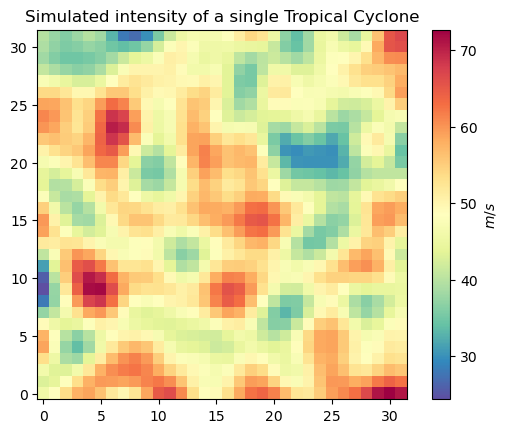

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm

mu = 50

def sq_exp_cov(tau, sigma=10, rho=10):
    return sigma** 2 * np.exp(- np.sum(tau ** 2, 0) / rho) + 1e-6 * np.all(tau == 0, 0)



try:
    intensity = load_from_cache('intensity')
except FileNotFoundError:
    grid = np.mgrid[:32, :32]
    flat_grid = np.reshape(grid, (2, -1, 1))
    taus = flat_grid - np.transpose(flat_grid, (0, 2, 1))
    
    cov_mat = sq_exp_cov(taus)
    dist = multivariate_normal(np.ones(32 ** 2) * mu, cov_mat)
    intensity = dist.rvs().reshape(32, 32)
    save_to_cache('intensity', intensity)

plt.figure()
plt.imshow(intensity, cmap='Spectral_r', origin='lower')
plt.colorbar(label='$m/s$')

plt.title('Simulated intensity of a single Tropical Cyclone');

### Defining our exposures

We will generate fake exposure data again. For instance, we would sample from a Bernoulli distribution at each location to determine the presence or absence of an asset (e.g. a building)

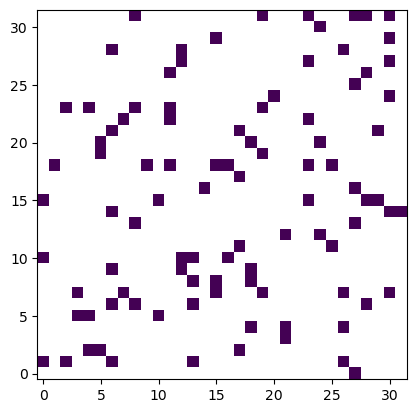

In [3]:
import matplotlib.pyplot as plt

from scipy.stats import bernoulli

exposure_mask = bernoulli(0.1).rvs(size=(32,32))
exposure_mask = np.where(exposure_mask, 1, np.nan)

plt.figure()
plt.imshow(exposure_mask, origin='lower');

We also need values for these assets (e.g. in dollars). We will simulate those according to an exponential distribution.

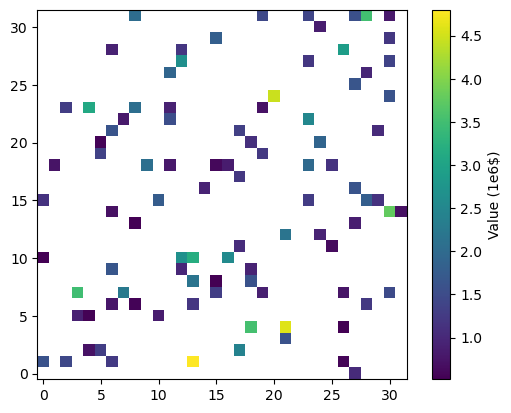

In [4]:
from scipy.stats import expon

lambd = 2
exposure_value = expon(1 / lambd).rvs(size=(32, 32))

plt.figure()
plt.imshow(exposure_mask * exposure_value, origin='lower')
plt.colorbar(label='Value (1e6\$)');

### Defining our impact function

The impact function takes the intensity as an argument, and returns a real number bewteen 0 and 1, corresponding to a percentage. Here, we arbitrarily define the impact function as,

\begin{equation}
    f_{\text{impact}}(x) = \min(1, (x / 80)^4)
\end{equation}

We note that with this functional form, the impact function is close to zero for low intensities, and reaches 1 for high intensities, as we would naturally expect. The minimum function is used so that $f_{\text{impact}}$ does not take values greater than 1.

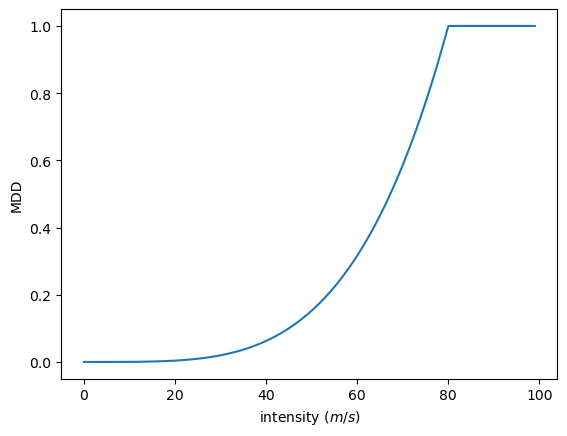

In [5]:
import matplotlib.pyplot as plt

def impact_function(intensity, max_intensity=80):
    def func(x):
        return (x / max_intensity) ** 4
    return np.minimum(1, func(intensity))

plt.figure()
plt.plot(np.arange(100), impact_function(np.arange(100)))
plt.xlabel('intensity ($m/s$)')
plt.ylabel('MDD');

### Impact calculation

We can now evaluate the severity of our simulated event in terms of the three components (intensity, exposure and impact function) which we defined. Specifically, we can write the impact as,

\begin{equation}
    \text{severity} = \sum_{\text{location } j} {\text{exposure}(j) \times f_\text{impact}(\text{intensity}(j))}
\end{equation}

In [6]:
def calculate_impact(intensity, exposure, impact_function):
    return np.nansum(exposure * impact_function(intensity))

exposure = exposure_mask * exposure_value

calculate_impact(intensity, exposure, impact_function)

24.057618592658446

## Limitations of our toy example

Obviously, this toy example is of little use for the real world and has many limitations.

### Intensity

In this toy example, we define our intensity in a very basic way that is very far from being realistic.

We also defined it for a single event. In practice, we want to use a collection of event to define hazards in terms of both their intensity and their frequency. 

In this module, you will learn how to:
1. Leverage real-world data from the past to define the intensity and frequency of hazards
2. Define stochastic models from historical data for an even more comprehensive approach

For instance, the first example that we will look at in CLIMADA is that of Tropical Cyclones, where we have data of their trajectories (and more) over several decades.

This raises another point: usually, the raw intensity data is usually not in the right format (e.g. here, as an intensity over a spatial grid). 

### Exposures

In our example, we simulated exposure data in a very arbitrary fashion. In practice, we want to use real-world data. This is not always an easy task: how can we know the spatial repartition of building value over Mayotte for instance? 

We will leverage two approaches:
1. Litpop: this is a novel method that combines night light from satellite data with measures such as GDP
2. Open Street Map

### Impact function

Finally, we also defined our impact function via arbitrary means. In the first real-world example that we will study, we will use a pre-calibrated impact function. Further into this module, we will discuss how one can calibrate an impact function based on previous natural disasters.